In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
### IMPORTING MY DATA FRAME OF SALES
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [3]:
df.shape

(1000, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
df.describe(include='all')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.00000,1000.000000,1000.000000,1000.00000
unique,1000,3,3,2,2,6,NaN,NaN,NaN,NaN,89,506,3,NaN,NaN,NaN,NaN
top,849-09-3807,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,2/7/2019,19:48,Ewallet,NaN,NaN,NaN,NaN
freq,1,340,340,501,501,178,NaN,NaN,NaN,NaN,20,7,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,15.379369,322.966749,NaN,NaN,NaN,307.58738,4.761905,15.379369,6.97270
std,NaN,NaN,NaN,NaN,NaN,NaN,26.494628,2.923431,11.708825,245.885335,NaN,NaN,NaN,234.17651,0.000000,11.708825,1.71858
min,NaN,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,NaN,NaN,NaN,10.17000,4.761905,0.508500,4.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,5.924875,124.422375,NaN,NaN,NaN,118.49750,4.761905,5.924875,5.50000
50%,NaN,NaN,NaN,NaN,NaN,NaN,55.230000,5.000000,12.088000,253.848000,NaN,NaN,NaN,241.76000,4.761905,12.088000,7.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,77.935000,8.000000,22.445250,471.350250,NaN,NaN,NaN,448.90500,4.761905,22.445250,8.50000


In [9]:
df.Gender.value_counts()

Gender
Female    501
Male      499
Name: count, dtype: int64

In [11]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [13]:
### Total Revenue across al branches
df[['Total','gross income']].agg({'sum'})

,Total,gross income
sum,322966.749,15379.369


In [15]:
### Total revenue by branch
df.groupby(['Branch'])[['Total','gross income']].agg({sum})

C:\Users\irfan\AppData\Local\Temp\ipykernel_13616\255336075.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.groupby(['Branch'])[['Total','gross income']].agg({sum})
C:\Users\irfan\AppData\Local\Temp\ipykernel_13616\255336075.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.groupby(['Branch'])[['Total','gross income']].agg({sum})


,Total,gross income
,sum,sum
Branch,,
A,106200.3705,5057.1605
B,106197.6720,5057.0320
C,110568.7065,5265.1765


In [16]:
## Second trial
df.groupby(['Branch']).agg({'Total':'sum','gross income':'sum'}) ## This is the best

,Total,gross income
Branch,,
A,106200.3705,5057.1605
B,106197.6720,5057.0320
C,110568.7065,5265.1765


In [17]:
## How sales performance vary by branch and city
df.groupby(['Branch','City']).agg({'Total':'sum','gross income':'sum'})

,,Total,gross income
Branch,City,,
A,Yangon,106200.3705,5057.1605
B,Mandalay,106197.6720,5057.0320
C,Naypyitaw,110568.7065,5265.1765


In [20]:
df.head(4)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4


In [22]:
### Top selling product categories and products
category_df = df.groupby(['Product line']).agg({'Total':'sum'})
category_df

,Total
Product line,
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Food and beverages,56144.8440
Health and beauty,49193.7390
Home and lifestyle,53861.9130
Sports and travel,55122.8265


In [23]:
category_df['Total'].max()

np.float64(56144.844)

In [26]:
category_df['Total'] == 56144.844

Product line
Electronic accessories    False
Fashion accessories       False
Food and beverages         True
Health and beauty         False
Home and lifestyle        False
Sports and travel         False
Name: Total, dtype: bool

In [ ]:
## How have sales evolved over time

In [ ]:
## Are there any seasonal trends in sales

In [ ]:
## What are the peak hours and days for sale

TIME PERIOD FOR SALES

In [31]:
## In days
## Convert the date to datetime

df['Date'] = pd.to_datetime(df['Date'])

In [32]:
## In days
total_days = (df['Date'].max() - df['Date'].min()).days
print(f'The total period taken is {total_days} days')

The total period taken is 88 days


In [35]:
## In months
total_months = (df['Date'].max().month - df['Date'].min().month)
print(f'The total period taken is {total_months} days')

The total period taken is 2 days


In [ ]:
## The distribution of customer rating

In [40]:
## Most popular payment method
popular_payment = df.groupby(['Payment'])['Payment'].agg({'count'})
popular_payment

,count
Payment,
Cash,344
Credit card,311
Ewallet,345


In [46]:
## Popular payment method
popular_payment.agg({'max'})

,count
max,345


In [44]:
## Most popular payment method
print(f'\n The most popupar payment method \n',popular_payment.agg({'max'}))


 The most popupar payment method 
      count
max    345


In [49]:
## Getting the correlation by first getting the continuous data
cont_df = df.select_dtypes(include=['int64','float64'])
cont_df

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,4.761905,2.0175,6.2
996,97.38,10,48.6900,1022.4900,973.80,4.761905,48.6900,4.4
997,31.84,1,1.5920,33.4320,31.84,4.761905,1.5920,7.7
998,65.82,1,3.2910,69.1110,65.82,4.761905,3.2910,4.1


In [50]:
corr_matrix = cont_df.corr()
corr_matrix

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


<Axes: >

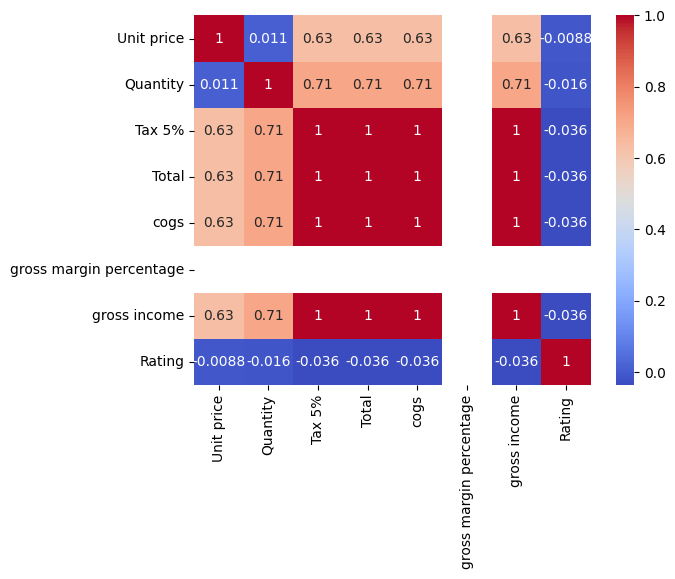

In [51]:
## Making a heatmap
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')